In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow_datasets as tfds

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

import seaborn as sns
import pandas as pd

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data, breast_cancer, digits

In [2]:
image_size = 28 # width and length are equal
data_path = "./data/"
train_data = np.loadtxt(".\\data\\mnist_train.csv", delimiter=",")
test_data = np.loadtxt(".\\data\\mnist_test.csv", delimiter=",")

In [4]:


n_samples = 10000

train_data_features = train_data[:n_samples, 1:]
train_data_labels = train_data[:n_samples, :1].reshape(n_samples,)

print(train_data_features.shape)
print(train_data_labels.shape)

tsvd = TruncatedSVD(n_components=10)
X_SVD = tsvd.fit_transform(train_data_features)

np.random.seed(0)
tsne = TSNE(n_components=2)
train_data_features_reduced = tsne.fit_transform(X_SVD)

print(train_data_features_reduced.shape)

(10000, 784)
(10000,)


C:\Users\ahrPo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ahrPo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10000, 2)


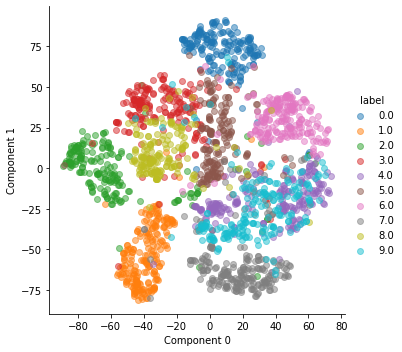

In [5]:
def plotdataset(X, Y, c1, c2, N):
    lbl1 = f'Component {c1}'
    lbl2 = f'Component {c2}'    
    df = pd.DataFrame({lbl1:X[:N,c1], lbl2:X[:N,c2], 'label':Y[:N]})
    sns.lmplot(data=df, x=lbl1, y=lbl2, fit_reg=False, hue='label', scatter_kws={'alpha':0.5})

plotdataset(train_data_features_reduced, train_data_labels, 0, 1, N=2000)

In [6]:
#NORMALIZAMOS LOS DATOS

zero_datapoints_array = [] #an array of the data points containing value 0
one_datapoints_array = []# an array of the data points containing value 1
two_datapoints_array = []# an array of the data points containing value 2
three_datapoints_array = []# an array of the data points containing value 3

for i in range(n_samples):
    if train_data_labels[i] == 0:                   # extracting zeros
        zero_datapoints_array.append(train_data_features_reduced[i])

for i in range(n_samples):
    if train_data_labels[i] == 1:                   # extracting ones
        one_datapoints_array.append(train_data_features_reduced[i])

for i in range(n_samples):
    if train_data_labels[i] == 2:                   # extracting twos
        two_datapoints_array.append(train_data_features_reduced[i])

for i in range(n_samples):
    if train_data_labels[i] == 3:                   # extracting twos
        three_datapoints_array.append(train_data_features_reduced[i])        
        
zero_datapoints_array = np.array(zero_datapoints_array)
one_datapoints_array = np.array(one_datapoints_array)
two_datapoints_array = np.array(two_datapoints_array)
three_datapoints_array = np.array(three_datapoints_array)

def normalize(arr, max_val, n):
    a = np.divide(arr, max_val)
    return a + n

zero_datapoints_normalized = normalize(zero_datapoints_array, 100, 1)
one_datapoints_normalized = normalize(one_datapoints_array, 100, 1)
two_datapoints_normalized = normalize(two_datapoints_array, 100, 1)
three_datapoints_normalized = normalize(three_datapoints_array, 100, 1)

print(zero_datapoints_array.shape)
print(one_datapoints_array.shape)
print(two_datapoints_array.shape)
print(three_datapoints_array.shape)

(1001, 2)
(1127, 2)
(991, 2)
(1032, 2)


In [25]:
feature_dim = 2
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

backend = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024)

kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [22]:
#CREAMOS LOS DATASETS DE ENTRENAMIENTO Y TESTEO

train_size = 50
test_size = 10
dp_size_zero = 5
dp_size_one = 5

zero_train = zero_datapoints_normalized[:train_size]
one_train = one_datapoints_normalized[:train_size]
two_train = two_datapoints_normalized[:train_size]
three_train = three_datapoints_normalized[:train_size]

train_features = []
train_labels = []
for i in range(0, train_size):
    train_features.append(zero_train[i])
    train_labels.append(0)

for i in range(0, train_size):
    train_features.append(one_train[i])
    train_labels.append(1)

for i in range(0, train_size):
    train_features.append(two_train[i])
    train_labels.append(2)

for i in range(0, train_size):
    train_features.append(three_train[i])
    train_labels.append(3)



zero_test = zero_datapoints_normalized[train_size + 1:train_size + test_size + 1]
one_test = one_datapoints_normalized[train_size + 1:train_size + test_size + 1]
two_test = two_datapoints_normalized[train_size + 1:train_size + test_size + 1]
three_test = three_datapoints_normalized[train_size + 1:train_size + test_size + 1]

test_features = []
test_labels = []
for i in range(0, test_size):
    test_features.append(zero_test[i])
    test_labels.append(0)

for i in range(0, test_size):
    test_features.append(one_test[i])
    test_labels.append(1)

for i in range(0, test_size):
    test_features.append(two_test[i])
    test_labels.append(2)

for i in range(0, test_size):
    test_features.append(three_test[i])
    test_labels.append(3)

In [35]:
#PRUEBA CON EL CLASIFICADOR CLASICO

svc = SVC(kernel="linear")
svc.fit(train_features, train_labels)
score = svc.score(test_features, test_labels)

print(f'Callable kernel classification test score: {score}')

Callable kernel classification test score: 0.95


In [24]:
#PRUEBA CON EL CLASIFICADOR CUANTICO

qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)

print(f'QSVC classification test score: {qsvc_score}')

QSVC classification test score: 0.975
